In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1,0],[0,1],[0,1],[1,0]])

In [149]:
nx =2  # input layer 
nh = 2 #hidden layer
ny = 2 #output layer
lr =  0.01
epochs = 10000

In [150]:
w1 = np.random.randn(nh,nx)
w2 = np.random.randn(nh,nh)
w3 = np.random.randn(ny,nh)

In [151]:
def tanh(x) :
    return np.tanh(x) # Activation function
def tanh_deiv(x):
    return 1-np.tanh(x)**2#Derivative of Activation function
def linear (x):
    return x #Output layer
def linear_deriv(x):
    return 1 



In [152]:
def fprop(w1,w2,w3,x):
    z1 = np.dot(x,w1.T)
    a1 = tanh(z1)

    z2 = np.dot(a1,w2.T)
    a2 = tanh(z2)

    z3 = np.dot(a2,w3.T)
    a3 = linear(z3)
    return z1,a1,z2,a2,z3,a3 # z1 ,z2,z3 are weightted sums

In [153]:
def backprop (w1,w2,w3,a1,z1,a2,z2,z3,a3,y):
    e3 = y-a3
    del3 = linear_deriv(z3)*e3
    e2 = np.dot(del3,w3)
    del2 = tanh_deiv(z2)*e2
    e1 = np.dot(del2,w2)
    del1 = tanh_deiv(z1)*e1

    dw3 =  lr * np.dot(del3.T,a2)
    dw2 = lr * np.dot(del2.T,a1)
    dw1 = lr * np.dot(del1.T,x)

    return dw3,dw2,dw1




In [ ]:
losses = []
for i in range (epochs) :
    z1,a1,z2,a2+,z3,a3 = fprop(w1,w2,w3,x)
    loss = mean_squared_error(y,a3)
    losses.append(loss)
    dw3,dw2,dw1 = backprop(w1,w2,w3,a1,z1,a2,z2,z3,a3,y)
    #update the weights
    w3 += dw3
    w2 += dw2
    w1 += dw1

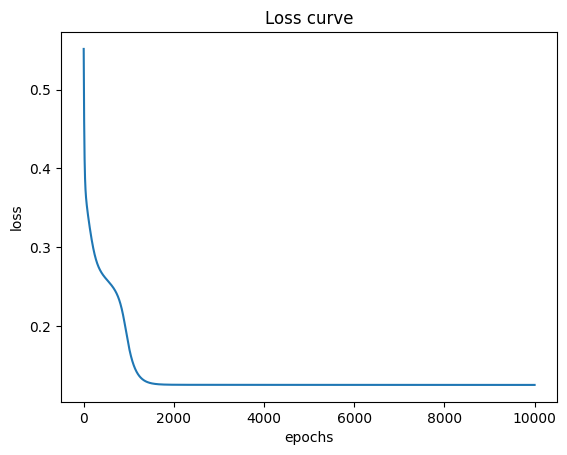

For input [0 0] output is [0,0]
For input [0 1] output is [0,1]
For input [1 0] output is [0,1]
For input [1 1] output is [1,0]


In [155]:
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Loss curve")
plt.show()

def predict(w1, w2, w3, inp):
    z1, a1, z2, a2, z3, a3 = fprop(w1, w2, w3, inp)
    
    if a3[0] >= 0.5 and a3[1] >= 0.5:
        print("For input", inp, "output is [1,1]")
    elif a3[0] >= 0.5 and a3[1] < 0.5:
        print("For input", inp, "output is [1,0]")
    elif a3[0] < 0.5 and a3[1] >= 0.5:
        print("For input", inp, "output is [0,1]")  
    else:
        print("For input", inp, "output is [0,0]")


test1=np.array([0,0])
test2=np.array([0,1])
test3=np.array([1,0])
test4=np.array([1,1])

predict(w1,w2,w3,test1)
predict(w1,w2,w3,test2)
predict(w1,w2,w3,test3)
predict(w1,w2,w3,test4)